**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set_context('talk') #Seaborn graph format
pd.options.display.float_format = '{:20,.2f}'.format #Supress scientific notation

In [2]:
import plotly 
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

In [3]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


In [4]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
melb_df['date'] = pd.to_datetime(melb_df.Date)

## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [6]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/Users/itsupport/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


----

## Ejercicio 1.1

Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [7]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,"13,580.00","13,580.00","13,580.00","13,580.00","13,580.00","13,580.00","13,518.00","13,580.00","7,130.00","8,205.00","13,580.00","13,580.00","13,580.00"
mean,2.94,"1,075,684.08",10.14,"3,105.30",2.91,1.53,1.61,558.42,151.97,"1,964.68",-37.81,145.00,"7,454.42"
std,0.96,"639,310.72",5.87,90.68,0.97,0.69,0.96,"3,990.67",541.01,37.27,0.08,0.10,"4,378.58"
min,1.00,"85,000.00",0.00,"3,000.00",0.00,0.00,0.00,0.00,0.00,"1,196.00",-38.18,144.43,249.00
25%,2.00,"650,000.00",6.10,"3,044.00",2.00,1.00,1.00,177.00,93.00,"1,940.00",-37.86,144.93,"4,380.00"
50%,3.00,"903,000.00",9.20,"3,084.00",3.00,1.00,2.00,440.00,126.00,"1,970.00",-37.80,145.00,"6,555.00"
75%,3.00,"1,330,000.00",13.00,"3,148.00",3.00,2.00,2.00,651.00,174.00,"1,999.00",-37.76,145.06,"10,331.00"
max,10.00,"9,000,000.00",48.10,"3,977.00",20.00,8.00,10.00,"433,014.00","44,515.00","2,018.00",-37.41,145.53,"21,650.00"


Dado que vemos valores máximos que se alejan mucho del percentil 75 y de la desviación estándar, decidimos profundizar el análisis en las columnas "Landsize" y "BuildingArea". Lo mismo ocurre con el valor mínimo de "YearBuilt"

In [8]:
melb_df.sort_values(by=['Landsize'], ascending=False).head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,date
11020,Fitzroy,389 Gore St,3,h,"2,700,000.00",VB,Kay,12/08/2017,2.10,"3,065.00",...,1.00,"433,014.00",NaN,NaN,Yarra,-37.80,144.98,Northern Metropolitan,"5,825.00",2017-12-08
10504,Silvan,16 Eleanor Dr,3,h,"1,085,000.00",S,Harcourts,27/05/2017,34.60,"3,795.00",...,2.00,"76,000.00",NaN,NaN,Yarra Ranges,-37.85,145.47,Eastern Victoria,457.00,2017-05-27
687,Balwyn North,9 Gildan St,3,h,"2,000,000.00",VB,Kay,28/08/2016,9.20,"3,104.00",...,2.00,"75,100.00",NaN,NaN,Boroondara,-37.80,145.07,Southern Metropolitan,"7,809.00",2016-08-28
13245,New Gisborne,71 Hamilton Rd,5,h,"1,355,000.00",S,Raine,23/09/2017,48.10,"3,438.00",...,5.00,"44,500.00","44,515.00",NaN,NaN,-37.45,144.59,Northern Victoria,849.00,2017-09-23
5194,Reservoir,14 Beenak St,3,h,"572,000.00",S,Ray,23/04/2016,11.20,"3,073.00",...,2.00,"41,400.00",NaN,NaN,Darebin,-37.71,145.03,Northern Metropolitan,"21,650.00",2016-04-23


In [9]:
melb_df.sort_values(by=['BuildingArea'], ascending=False).head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,date
13245,New Gisborne,71 Hamilton Rd,5,h,"1,355,000.00",S,Raine,23/09/2017,48.10,"3,438.00",...,5.00,"44,500.00","44,515.00",NaN,NaN,-37.45,144.59,Northern Victoria,849.00,2017-09-23
1484,Bulleen,19 Warringal St,4,h,"1,280,000.00",S,Barry,11/03/2017,11.80,"3,105.00",...,2.00,732.00,"6,791.00",NaN,Manningham,-37.76,145.09,Eastern Metropolitan,"4,480.00",2017-11-03
2560,Fitzroy North,186 Queens Pde,2,t,"930,000.00",S,Nelson,3/09/2016,3.50,"3,068.00",...,0.00,"2,778.00","3,558.00",NaN,Yarra,-37.79,144.99,Northern Metropolitan,"6,244.00",2016-03-09
1588,Camberwell,46 Athelstan Rd,5,h,"2,608,000.00",S,Marshall,15/10/2016,7.80,"3,124.00",...,4.00,730.00,"3,112.00","1,920.00",Boroondara,-37.84,145.06,Southern Metropolitan,"8,920.00",2016-10-15
2234,Elsternwick,5/16 St Georges Rd,2,u,"741,000.00",S,Biggin,16/04/2016,8.50,"3,185.00",...,1.00,0.00,"1,561.00","1,966.00",Glen Eira,-37.88,145.00,Southern Metropolitan,"4,898.00",2016-04-16


In [10]:
melb_df.sort_values(by=['YearBuilt'], ascending=True).head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,date
9968,Mount Waverley,5 Armstrong St,3,h,"1,200,000.00",VB,McGrath,24/06/2017,14.20,"3,149.00",...,4.00,807.00,117.00,"1,196.00",Monash,-37.87,145.12,Eastern Metropolitan,"13,366.00",2017-06-24
2079,Collingwood,2/79 Oxford St,2,u,"855,000.00",S,Nelson,3/09/2016,1.60,"3,066.00",...,1.00,"2,886.00",122.00,"1,830.00",Yarra,-37.80,144.98,Northern Metropolitan,"4,553.00",2016-03-09
5860,St Kilda,51/167 Fitzroy St,3,u,"1,600,000.00",PI,Kay,25/02/2017,6.10,"3,182.00",...,2.00,0.00,3.00,"1,850.00",Port Phillip,-37.86,144.98,Southern Metropolitan,"13,240.00",2017-02-25
4843,Prahran,602/220 Commercial Rd,2,u,"841,000.00",S,hockingstuart,18/03/2017,4.50,"3,181.00",...,1.00,0.00,101.00,"1,850.00",Stonnington,-37.85,144.99,Southern Metropolitan,"7,717.00",2017-03-18
2554,Fitzroy,11 Henry St,2,h,"677,000.00",S,Chambers,27/11/2016,1.60,"3,065.00",...,0.00,67.00,NaN,"1,850.00",Yarra,-37.80,144.98,Northern Metropolitan,"5,825.00",2016-11-27


Claramente los valores atípicos son pocos y difieren mucho del resto y por ende decidimos eliminarlos para evitar distorsiones en el análisis

In [11]:
#Eliminamos valores atípicos y generamos un nuevo df
melb_data = melb_df.drop(index=[9968,11020,13245])

----

## Ejercicio 1.2

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

<AxesSubplot:>

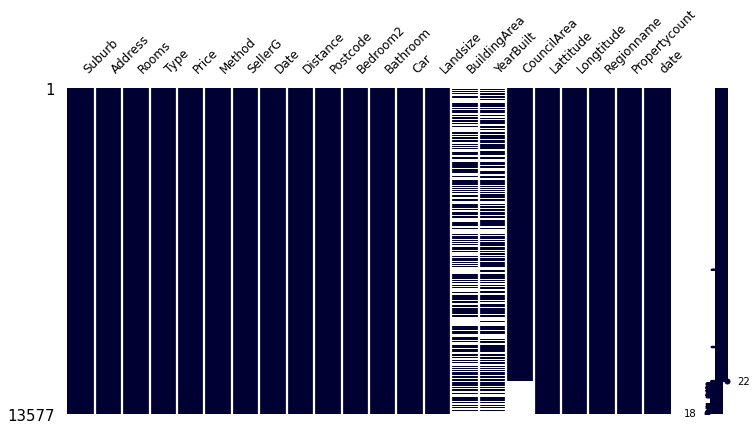

In [12]:
msno.matrix(melb_data,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

En primer lugar analizamos los valores nulos, graficando su presencia en las distintas columnas.

Luego decidimos separar las variables numéricas de las categóricas.

En el caso de las variables numéricas es importante ver la correlación entre las distintas variables por dos razones:

1. Para detectar variables redundantes (porque tienen valores con comportamientos muy similares a otra)
2. Para detectar cuáles influyen de mayor manera en el precio

<AxesSubplot:>

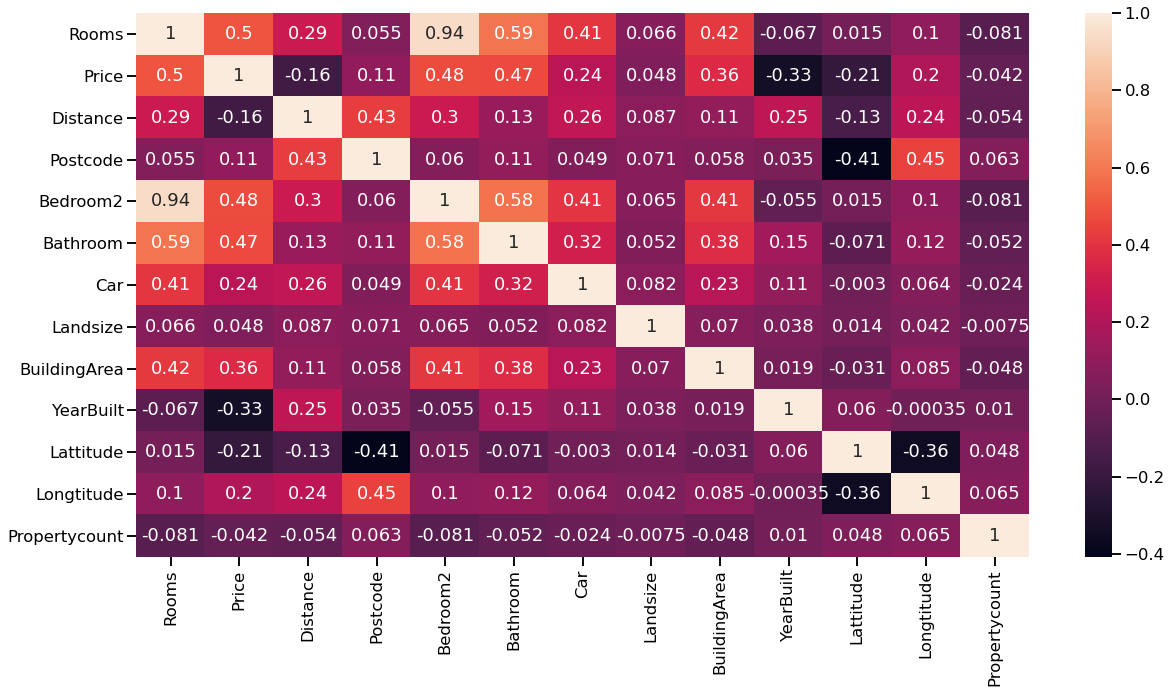

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(melb_data.corr(method='pearson'), annot = True)

In [14]:
#Borramos columnas numéricas poco relevantes
melb_data = melb_data.drop(['Bedroom2'], axis=1)
melb_data = melb_data.drop(['Landsize'], axis=1)
melb_data = melb_data.drop(['Propertycount'], axis=1)
#melb_data = melb_data.drop(['YearBuilt'], axis=1)

Detectamos una alta correlación entre "Rooms" y "Bedroom2", por lo que decidimos eliminar una. La seleccionada fue Bedroom2 ya que es la que tiene una menor correlación con el precio, que es la variable objeto de estudio.

También decidimos eliminar las columnas Landsize y PropertyCount debido a que tienen una correlación con el precio cercana a 0.

Yearbuilt tiene una correlación significativa, pero al tener gran cantidad de valores nulos y siendo una variable difícil de inferir, también la eliminamos

**Update** : La column YearBuilt se mantuvo debido a que se utilizará en un ejercicio posterior. De todas formas dejamos el código comentado.

In [15]:
#Seleccionamos variables categóricas
melb_data.select_dtypes(include='object').head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan


In [16]:
print('En la columna Suburb hay', len(melb_data.Suburb.unique()), 'valores distintos')
print('En la columna Address hay', len(melb_data.Address.unique()), 'valores distintos')
print('En la columna Type hay', len(melb_data.Type.unique()), 'valores distintos')
print('En la columna Method hay', len(melb_data.Method.unique()), 'valores distintos')
print('En la columna SellerG hay', len(melb_data.SellerG.unique()), 'valores distintos')
print('En la columna CouncilArea hay', len(melb_data.CouncilArea.unique()), 'valores distintos')
print('En la columna Regionname hay', len(melb_data.Regionname.unique()), 'valores distintos')

En la columna Suburb hay 313 valores distintos
En la columna Address hay 13375 valores distintos
En la columna Type hay 3 valores distintos
En la columna Method hay 5 valores distintos
En la columna SellerG hay 268 valores distintos
En la columna CouncilArea hay 34 valores distintos
En la columna Regionname hay 8 valores distintos


In [17]:
#Borramos columnas numéricas poco relevantes
melb_data = melb_data.drop(['Address'], axis=1)
melb_data = melb_data.drop(['SellerG'], axis=1)
#melb_data = melb_data.drop(['Suburb'], axis=1)

Para las variables categóricas decidimos eliminar a aquellas que tienen una gran variedad de valores únicos como Address, Suburb y Seller, ya que se dificulta encontrar patrones claros con tantas categorías dentro de la misma variable. 

**Update** : La column Suburb se mantuvo debido a que se utilizará en un ejercicio posterior. De todas formas dejamos el código comentado.

In [18]:
#Creamos categoría otros en la columna de Council Area para categorías con frecuencias menores a 200
OtherCouncil = melb_data.CouncilArea.value_counts() [melb_data.CouncilArea.value_counts() < 200]
melb_data['CouncilArea'] = np.where(melb_data['CouncilArea'].isin(OtherCouncil.index.to_list()), 'Other', melb_data['CouncilArea'])

In [19]:
melb_data.CouncilArea.value_counts()

Moreland         1163
Boroondara       1160
Moonee Valley     997
Darebin           934
Other             857
Glen Eira         848
Stonnington       719
Maribyrnong       692
Yarra             646
Port Phillip      628
Banyule           594
Bayside           489
Melbourne         470
Hobsons Bay       434
Brimbank          424
Monash            332
Manningham        311
Whitehorse        304
Kingston          207
Name: CouncilArea, dtype: int64

In [20]:
#Df luego de limpieza de columnas
melb_data.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,date
0,Abbotsford,2,h,"1,480,000.00",S,3/12/2016,2.50,"3,067.00",1.00,1.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,2016-03-12
1,Abbotsford,2,h,"1,035,000.00",S,4/02/2016,2.50,"3,067.00",1.00,0.00,79.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,2016-04-02
2,Abbotsford,3,h,"1,465,000.00",SP,4/03/2017,2.50,"3,067.00",2.00,0.00,150.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,2017-04-03
3,Abbotsford,3,h,"850,000.00",PI,4/03/2017,2.50,"3,067.00",2.00,1.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,2017-04-03
4,Abbotsford,4,h,"1,600,000.00",VB,4/06/2016,2.50,"3,067.00",1.00,2.00,142.00,"2,014.00",Yarra,-37.81,144.99,Northern Metropolitan,2016-04-06


----

## Ejercicio 1.3

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

In [21]:
airbnb_df.head()

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.77,145.09,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.77,144.98,35,200.00,803.00
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.86,144.98,159,"1,253.00","4,452.00"
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.76,144.99,50,250.00,920.00
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.86,144.99,69,400.00,"1,900.00"


Las variables que pensamos analizar son las siguientes:
* Cantidad de propiedades por zipcode
* Distintas métricas de precio (diario, porque los otros pueden tener valores nulos): Media, mediana, valores mínimos y máximos.



In [22]:
#Filtro columnas relevantes, agrupo y obtengo números resumen
airbnb_price = airbnb_df[['zipcode','price']].groupby('zipcode').describe().reset_index()

#Eliminamos el multiindex
airbnb_price.columns = [
' '.join(col).strip()
  for col in airbnb_price.columns.values]

airbnb_price.head()

,zipcode,price count,price mean,price std,price min,price 25%,price 50%,price 75%,price max
0,"2,010.00",1.00,40.00,NaN,40.00,40.00,40.00,40.00,40.00
1,"2,134.00",1.00,50.00,NaN,50.00,50.00,50.00,50.00,50.00
2,"2,582.00",1.00,104.00,NaN,104.00,104.00,104.00,104.00,104.00
3,"3,000.00","2,491.00",149.24,118.73,0.00,100.00,129.00,163.00,"2,171.00"
4,"3,001.00",1.00,120.00,NaN,120.00,120.00,120.00,120.00,120.00


In [23]:
#Convierto zipcode a numérico para poder hacer merge
airbnb_price['zipcode'] = pd.to_numeric(airbnb_price.zipcode, errors='coerce')

#Efectúo el merge
melb_data_abnb = melb_data.merge(airbnb_price, how='left', left_on='Postcode', right_on='zipcode')

#Elimino columnas resumen que no utilizaremos
del melb_data_abnb['zipcode']
del melb_data_abnb['price std']
del melb_data_abnb['price 25%']
del melb_data_abnb['price 75%']

melb_data_abnb.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,...,CouncilArea,Lattitude,Longtitude,Regionname,date,price count,price mean,price min,price 50%,price max
0,Abbotsford,2,h,"1,480,000.00",S,3/12/2016,2.50,"3,067.00",1.00,1.00,...,Yarra,-37.80,145.00,Northern Metropolitan,2016-03-12,157.00,140.29,28.00,101.00,900.00
1,Abbotsford,2,h,"1,480,000.00",S,3/12/2016,2.50,"3,067.00",1.00,1.00,...,Yarra,-37.80,145.00,Northern Metropolitan,2016-03-12,101.00,115.59,30.00,96.00,400.00
2,Abbotsford,2,h,"1,035,000.00",S,4/02/2016,2.50,"3,067.00",1.00,0.00,...,Yarra,-37.81,144.99,Northern Metropolitan,2016-04-02,157.00,140.29,28.00,101.00,900.00
3,Abbotsford,2,h,"1,035,000.00",S,4/02/2016,2.50,"3,067.00",1.00,0.00,...,Yarra,-37.81,144.99,Northern Metropolitan,2016-04-02,101.00,115.59,30.00,96.00,400.00
4,Abbotsford,3,h,"1,465,000.00",SP,4/03/2017,2.50,"3,067.00",2.00,0.00,...,Yarra,-37.81,144.99,Northern Metropolitan,2017-04-03,157.00,140.29,28.00,101.00,900.00


La unión entre los dos DF se podría haber hecho también usando las columnas de neighborhood y suburb. Sin embargo, vemos que en el df de airbnb hay veces que los valores en esas columnas son iguales, por lo que la unión perdería precisión en comparación con la que se hace usando el código postal.

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



En el gráfico de la actividad 1 donde analizamos los valores nulos (usando la librería missingno) se observa que los datos faltantes de la columna CouncilArea están todos concentrados al final del dataset, por lo que inferimos que son datos faltantes de tipo perdido. 

Para imputarlos decidimos reemplazar los valores nulos por el valor de la columna Suburb. Una forma más precisa sería la de identificar a través de la distancia a la casa más cercana y asignarle el correspondiente valor, pero la complejidad de esa solución excede al ejercicio.

In [24]:
melb_data_abnb['CouncilArea'] = np.where(melb_data_abnb['CouncilArea'].isna(), melb_data_abnb['Suburb'], melb_data_abnb['CouncilArea'])

<AxesSubplot:>

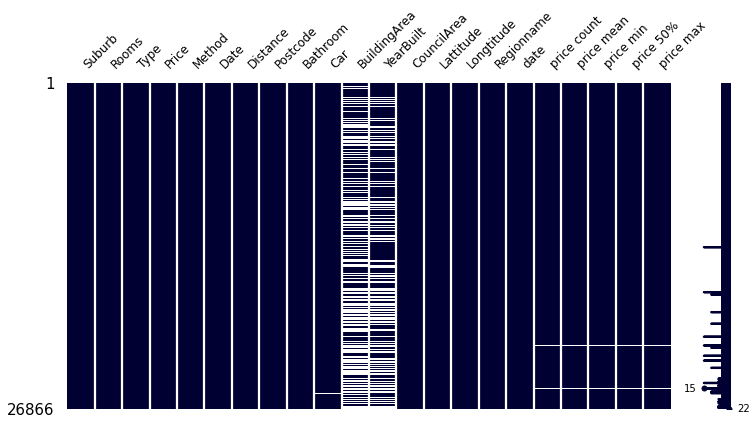

In [25]:
msno.matrix(melb_data_abnb,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

Todas las modificaciones al df las hicimos en cascada (En el punto 1.3 trabajamos con el df generado en el 1.2 y así sucesivamente, por lo que el df resultante es melb_data_abnb).

In [26]:
melb_data_abnb.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,...,CouncilArea,Lattitude,Longtitude,Regionname,date,price count,price mean,price min,price 50%,price max
0,Abbotsford,2,h,"1,480,000.00",S,3/12/2016,2.50,"3,067.00",1.00,1.00,...,Yarra,-37.80,145.00,Northern Metropolitan,2016-03-12,157.00,140.29,28.00,101.00,900.00
1,Abbotsford,2,h,"1,480,000.00",S,3/12/2016,2.50,"3,067.00",1.00,1.00,...,Yarra,-37.80,145.00,Northern Metropolitan,2016-03-12,101.00,115.59,30.00,96.00,400.00
2,Abbotsford,2,h,"1,035,000.00",S,4/02/2016,2.50,"3,067.00",1.00,0.00,...,Yarra,-37.81,144.99,Northern Metropolitan,2016-04-02,157.00,140.29,28.00,101.00,900.00
3,Abbotsford,2,h,"1,035,000.00",S,4/02/2016,2.50,"3,067.00",1.00,0.00,...,Yarra,-37.81,144.99,Northern Metropolitan,2016-04-02,101.00,115.59,30.00,96.00,400.00
4,Abbotsford,3,h,"1,465,000.00",SP,4/03/2017,2.50,"3,067.00",2.00,0.00,...,Yarra,-37.81,144.99,Northern Metropolitan,2017-04-03,157.00,140.29,28.00,101.00,900.00


In [27]:
melb_data_abnb.to_csv('df_melbourne_entregable1.csv', index=False)